Matrix A:
 [[0.   0.   1.2  1.1  0.8 ]
 [0.45 0.   0.   0.   0.  ]
 [0.   0.65 0.   0.   0.  ]
 [0.   0.   0.75 0.   0.  ]
 [0.   0.   0.   0.7  0.  ]]


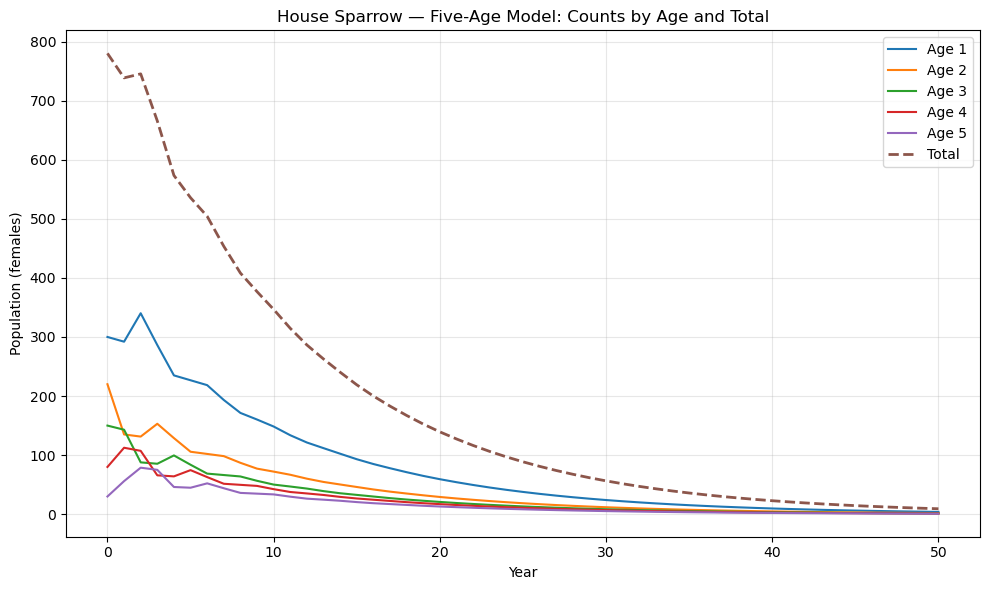

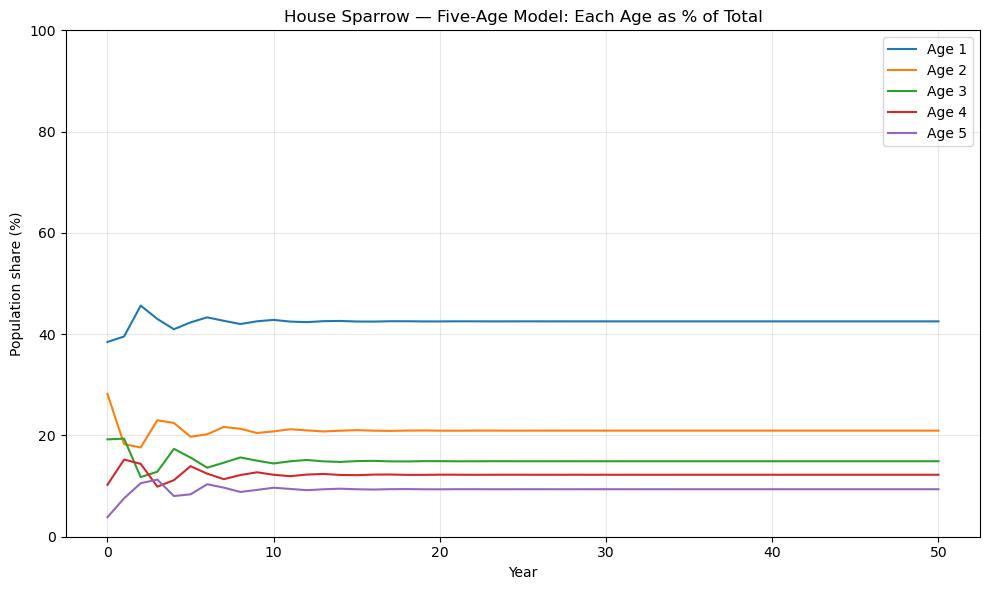

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# House Sparrow (Passer domesticus) 5-age structured population model
# Female-only, yearly time step. Ages: 1=juvenile, 2=yearling, 3–5=adults.
# Parameters are plausible for small passerines.
# ------------------------------------------------------------

def simulate_age_structured(
    years,
    N0,
    F3, F4, F5,
    S1, S2, S3, S4
):
    """
    5-age model with reproduction from ages 3–5 only.

    State vector order each year t: [N1_t, N2_t, N3_t, N4_t, N5_t]

    Recurrence:
      N1_{t+1} = F3*N3_t + F4*N4_t + F5*N5_t
      N2_{t+1} = S1*N1_t
      N3_{t+1} = S2*N2_t
      N4_{t+1} = S3*N3_t
      N5_{t+1} = S4*N4_t
    """
    # Build the matrix 
    A = np.array([
        [0.0, 0.0, F3,  F4,  F5],  # fecundities from ages 3-5
        [S1,  0.0, 0.0, 0.0, 0.0], # survival 1->2
        [0.0, S2,  0.0, 0.0, 0.0], # survival 2->3
        [0.0, 0.0, S3,  0.0, 0.0], # survival 3->4
        [0.0, 0.0, 0.0, S4,  0.0], # survival 4->5
    ], dtype=float)
    
    # Eigen analysis: dominant eigenvalue (lambda) and stable age distribution
    vals, vecs = np.linalg.eig(A)
    lam = float(np.max(np.real(vals)))
    vec = np.real(vecs[:, np.argmax(np.real(vals))])
    sad = vec / vec.sum() if vec.sum() != 0 else vec

    # Simulate forward
    N = np.empty((years + 1, 5), dtype=float)
    N[0] = np.array(N0, dtype=float)
    for t in range(1, years + 1):
        N[t] = A @ N[t-1]

    totals = N.sum(axis=1)
    with np.errstate(divide='ignore', invalid='ignore'):
        perc = np.where(totals[:, None] > 0, (N / totals[:, None]) * 100.0, 0.0)
    

    return N, totals, perc, A, lam, sad


# Parameters for the example
years = 50
# Initial female population by age at t=0: [N1, N2, N3, N4, N5]
N0 = [300, 220, 150, 80, 30]

# Fecundities for ages 3–5 (female recruits per female, counted as age-1 next year)
F3, F4, F5 = 1.20, 1.10, 0.80

# Survivals along the sub-diagonal
S1, S2, S3, S4 = 0.45, 0.65, 0.75, 0.70

# To Run
N, totals, perc, A, lam, sad = simulate_age_structured(years, N0, F3, F4, F5, S1, S2, S3, S4)

# The matrix 
print("Matrix A:\n", A)

# Plotting the real values 

t = np.arange(years + 1)
labels = [f"Age {i}" for i in range(1, 6)]

plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(t, N[:, i], label=labels[i])
plt.plot(t, totals, '--', label='Total', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Population (females)')
plt.title('House Sparrow — Five-Age Model: Counts by Age and Total')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


# Plotting the percent of total population

plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(t, perc[:, i], label=labels[i])
plt.xlabel('Year')
plt.ylabel('Population share (%)')
plt.title('House Sparrow — Five-Age Model: Each Age as % of Total')
plt.ylim(0, 100)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()





Question: What was the real world example?

The real world example was a population model of female house sparrows with five age groups representing juveniles, yearlings, and three adult stages. The model used realistic fertility and survival rates that consider how sparrows reproduce and survive each year.

What was the result of the 50 year model using your initial populations?

In the real values graph, every age class steadily decreased. The total population declined until it reached extinction by the 50 year. In the percentage graph, each age group’s share of the total population changed slightly at first, with small peaks or dips, but then remained constant after about ten years. This showed that even though the total population continued to fall, the relative proportions of each age class stabilized early in the simulation.

Describe what the transient and stable behavior of the model looked like.

The transient behavior occurred during the first several years (percentage graph) when the population was still adjusting to the survival and reproduction rates. During this time, the proportions of each age group changed slightly, showing small peaks or declines as the model settled. The stable behavior began around year ten, when the percentage of each age group remained nearly constant even though the total population continued to decline. This showed that the population reached a steady age structure while still moving toward extinction.